# INET 4710 Project
## Estimate user post interaction from text and post data

Text Analysis of historical interaction data & content from removed facebook pages.

Author:

## 1. Overview

- what is the business problem?
	- (My problem: What is this data?, what is the tendency of data? Answer those question with document clustoring)
- Briefly describe the main objective of the project.
	- to clearfy the problem above
- List models created for project
	- k means,...
- Include relevant references

The data is from Facebook's user comment linked to 2016 US election investigation from following facebook pages.

- being_patriotic
- blacktivist
- lgbt_united
- secured_borders
- united_muslims_of_america

Data could download from Project page below.

- Project page: <https://data.world/d1gi/missing-fb-posts-w-share-stats?utm_campaign=dataquest&utm_source=blog&utm_content=180122>

**Download data needs to log in data.world**

Data vizualization example: <https://public.tableau.com/profile/d1gi#!/vizhome/FB4/TotalReachbyPage>

In [35]:
# path config
# I put all the path(data path and pickle object path) here.
from os import path

project_top_path = '/Users/reiven/Documents/Python/CSCI4710/Project'  # this path is Project folder path

# all the folder path(folder path are relative to project_top_path)
data_path = path.join(project_top_path, 'Data')  # Data folder path
binary_path = path.join(project_top_path, 'binary_file')  # binary_file folder path

# all the pickle object path(path are relative to binary_path)
tfidf_vectorizer_path = path.join(binary_path,"tfidf_vectorizer.pkl")
pca_result_path = path.join(binary_path, "pca_result.pkl")
random_forest10_path = path.join(binary_path, "random_forest10_result.pkl")
random_forest100_path = path.join(binary_path, "random_forest100_result.pkl")
random_forest1000_path = path.join(binary_path, "random_forest1000_result.pkl")

# TODO: add description of dataset fields here, then clearfy meaningless parameter(post_type, resource and so on)


----

## 2. Exploratory Data Analysis

In this section, I show following topics.

- numerical summary about all the data
- data structure of each dataframe
- effective data amount
- basic statistics about each columns of data
- word cloud to understand topic

In [2]:
# Loading data
from os import path
import pandas as pd


blacktivist_data = pd.read_csv(path.join(data_path, 'blacktivist.csv'))
being_patriotic_data = pd.read_csv(path.join(data_path, 'being_patriotic.csv'))
# heart_of_texas_data = pd.read_csv(path.join(data_path, 'heart_of_texas.csv'))
lgbt_united_data = pd.read_csv(path.join(data_path, 'lgbt_united.csv'))
secured_borders_data = pd.read_csv(path.join(data_path, 'secured_borders.csv'))
united_muslims_of_america_data = pd.read_csv(path.join(data_path, 'united_muslims_of_america.csv'))
summary_stats = pd.read_csv(path.join(data_path, 'fb_removed_list_stats.csv'))


In [4]:

def show_basic_info(data, title):
    """
    Function to show exploratory data analysis 
    that shows following tooic.
    
    - shape(# of rows and columns)
    - data set column names and it's basic summary(not NA, unique, mean and so on)
    :param data: panda's dataframe
    :param title: string
    :return: 
    """
    sep = "\n" + "-" * 10 + "\n"
    print("Data:", title)
    print("Shape(row, column):", data.shape, sep)
    # print("Column name and it's data type")
    # print(data.info(), sep)
    # print("Count of efficient(Not NA) data")
    # print(data.count(), sep)
    print("columns summary")
    print(data.describe(), sep) # remove text data summary
    print("Show first 5 data")
    print(data.head(5))


### 2.1. Short summary of all the data

In [117]:
summary_stats

,source,page_url,page_status,total_shares,interactions,number_of_posts,word_count
0,Blacktivists,Facebook.com/Blacktivists,removed,103767792,6182835,500+,15349.0
1,Heart of Texas,Facebook.com/Txrebels,removed,102950151,3453143,500+,NaN
2,United Muslims of America,Facebook.Com/MuslimAmerica,removed,71355895,2128875,500+,6892.0
3,Being Patriotic,Facebook.Com/Patriototus,removed,51139860,4438745,500+,53782.0
4,Secured Borders,Facebook.Com/Secured.Borders,removed,5600136,1592771,500+,53850.0
5,LGBT United,Facebook.Com/Lgtbun,removed,5187494,1262386,500+,15020.0


The result above shows that the there are 6 resources from facebook page, and all the page is removed. 

The top 2 pages(Blacktivists and Heart of Texas) has huge total shares compared to other topics, 
but the word count(it related to the amount of comment) is not so obviously huge.
I assume people have much interesting to these 2 topics or the pages were created much older than the other pages.

But, heart of texas data does not have actual comment text, so I omit in this project.

### 2.2 Basic statistics and preparation for each page data

In this section, I show each page's data and it's basic summary and format data properly.

First, I clearfy data structure to take Blacktivist data for example, and define what data to format.
After that, seeing each page's summary information and do same data preparation.

#### 2.2.1 Basic statistics about Blactivist page

In [5]:
show_basic_info(blacktivist_data, "Blactivist")

Data: Blactivist
Shape(row, column): (500, 10) 
----------

columns summary
          followers   interactions
count  5.000000e+02     500.000000
mean   2.075356e+05   12365.670000
std    3.478560e+05   27094.789618
min    0.000000e+00    2791.000000
25%    9.218100e+04    4170.250000
50%    1.714990e+05    5826.000000
75%    2.678510e+05    9324.750000
max    6.605641e+06  344309.000000 
----------

Show first 5 data
                    page_url       source  followers        date      time  \
0  Facebook.com/Blacktivists  Blacktivist     107180  2016-07-22  11:00:00   
1  Facebook.com/Blacktivists  Blacktivist     186908  2016-10-26  09:00:35   
2  Facebook.com/Blacktivists  Blacktivist     201136  2016-11-23  10:00:00   
3  Facebook.com/Blacktivists  Blacktivist     347948  2017-06-22  18:00:00   
4  Facebook.com/Blacktivists  Blacktivist     228980  2017-01-17  21:00:00   

  time_zone post_type  interactions  \
0  GMT-0400  Facebook        344309   
1  GMT-0400  Facebook        26

The result above shows that there are 500 columns of data and 2 data lost post_message items.

As the columns summary shows that page_url has only one type of item, most of the soruce and post_tye column also have same value and few outlier value is value which means not-recorded. To see first 5 items of data, both columns just shows the resouce place of the data and it is almost always from same resource.

And the date, time, time_zone columns is to specify when the data were posted by the user.

Also, post_link seems unique identifier of each post, it is not necessary data to analyse.


From the result above, I format all the data with following opearation.

1. removing data row which countain NA value.
2. removing page_url, source and post_link, post_type column from all the dataset.
3. combine date, time, time_zone to datetime object and omit date, time, and time_zone column.


In [6]:
from datetime import datetime
import pytz as tz


def format_data(df, page_label):
    """
    function to clean dataframes.
    this function drop rows which contains NA, 
    and drop page_url, source, post_link column
    instead of dropping page_url and source, I add page_label text.
    
    also create datetime column and remove date, time, time_zone
    :param df: 
    :param page_label:  
    :return df: 
    """
    past_shape = df.shape
    df = df.dropna(axis=0, how='any')
    df = df.drop(['page_url', 'source', 'post_link', 'post_type'], axis=1)
    df['page_label'] = page_label
    df = df.reset_index()  # reset index for datetime append operation
    
    datetime_list = list()
    for i in range(df.shape[0]):
        # need correct numerical index for code below.
        dt_str = '%s %s %s' % (df['date'][i], df['time'][i], df['time_zone'][i])
        dt_str = dt_str.strip()  # need strip to remove last blank character.
        try:
            dt_parsed = datetime.strptime(dt_str, '%Y-%m-%d %H:%M:%S %Z%z')
            CT = tz.timezone('America/Chicago')
            dt_parsed = dt_parsed.astimezone(CT)
        except ValueError as e:
            print(e)
            print('error happen :%s;' % dt_str)
            dt_parsed = None
        datetime_list.append(dt_parsed)

    df['datetime'] = datetime_list
    df = df.drop(['index', 'date', 'time', 'time_zone'], axis=1)
    df['datetime'] = pd.to_datetime(df['datetime'])

    show = True
    if show:
        print('result shape compare: ', past_shape, df.shape)
    return df


In [7]:

# format all data with format_data()
blacktivist = format_data(blacktivist_data, 'blacktivist')
being_patriotic = format_data(being_patriotic_data, 'being_patriotic')
lgbt_united = format_data(lgbt_united_data, 'lgbt_united')
secured_borders = format_data(secured_borders_data, 'secured_borders')
united_muslims_of_america = format_data(united_muslims_of_america_data, 'united_muslims')


result shape compare:  (500, 10) (498, 5)
result shape compare:  (500, 10) (496, 5)
result shape compare:  (500, 10) (500, 5)
result shape compare:  (500, 10) (500, 5)
result shape compare:  (500, 10) (500, 5)


In [8]:
# show important columns(latest, oldest, most interaction)

def show_important_columns(df):
    """
    show important the oldest, latest, and most interaction data.
    
    :param df: 
    :return: 
    """
    latest_column = df.sort_values('datetime').iloc[-1]
    oldest_column = df.sort_values('datetime').iloc[0]
    highest_interaction_column = df.sort_values('interactions').iloc[-1]
    print("show important columns\n")
    print('# latest data')
    print(latest_column, end='\n\n')
    print('# oldest data')
    print(oldest_column, end='\n\n')
    print('# highest interaction data')
    print(highest_interaction_column, end='\n\n')


In [9]:

# show blacktivist important data with show_important_columns
show_important_columns(blacktivist)

show important columns

# latest data
followers                                           389601
interactions                                          5162
post_message    DON'T PRETEND THAT AGGRESSION HAS NO COLOR
page_label                                     blacktivist
datetime                         2017-08-26 06:00:00-05:00
Name: 295, dtype: object

# oldest data
followers                                                       0
interactions                                                 3524
post_message    ISIS is no worse than the KKK. American societ...
page_label                                            blacktivist
datetime                                2015-11-26 07:18:31-06:00
Name: 437, dtype: object

# highest interaction data
followers                                                  107180
interactions                                               344309
post_message    A 14-year-old Royce Mann brought hundreds of p...
page_label                                    

In [16]:
# define function to show user_post count plot
import matplotlib.pyplot as plt
from datetime import timedelta
from copy import copy
import seaborn as sns

sns.set_style("white")


def show_time_plot(df, title):
    """
    show plot to see the increasing of comment.
    each bar is weekly count of user comment.
    line plot is cumsum count.
    
    :param df: 
    :param title: 
    :return: 
    """
    # TODO: fix plot better
    label_list = []
    week_count_dict = {}
    sort_by_dt = df.sort_values('datetime')
    oldest = sort_by_dt.iloc[0]['datetime']
    latest = sort_by_dt.iloc[-1]['datetime']
    
    delta = timedelta(days=7)
    while oldest < latest:
        label = str(oldest.to_pydatetime()).split(' ')[0]
        label_list.append(label)
        temp = df[(df['datetime'] >= oldest) & (df['datetime'] < (oldest + delta))]
        oldest = oldest + delta
        week_count_dict[label] = temp.shape[0]
    data = list()
    cumsum_data = list()
    for label in label_list:
        data.append(week_count_dict[label])
    for i in range(len(label_list)):
        if i == 0:
            cumsum_data.append(week_count_dict[label_list[i]])
        else:
            cumsum_data.append(cumsum_data[i - 1] + week_count_dict[label_list[i]]) 
    label_list_show = copy(label_list)
    max_index = data.index(max(data))
    for i in range(len(label_list_show)):
        if i not in [0, max_index, len(label_list_show) - 1]:
            label_list_show[i] = ''
    
    plt.title('comment amount of %s' % title)
    plt.bar(label_list, data, width=1.0,color='blue', label='comment per week')
    plt.plot(label_list, cumsum_data,color='green', label='cumsum comment')
    plt.xticks(label_list, label_list_show)
    plt.xlabel('Date')
    plt.ylabel('comment amount')
    plt.legend()
    plt.show()

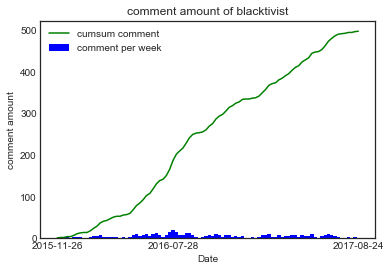

In [17]:

# show blacktivist's user comment situation with show_time_plot()
show_time_plot(blacktivist, 'blacktivist')


Word cloud of blacktivist page

In [10]:
# define function to show wordcloud of the post_message
"""
wordcloud is from 
<http://amueller.github.io/word_cloud/index.html>
"""
# wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wc(df):
    text = ','.join(df['post_message'])

    # Generate a word cloud image
    wordcloud = WordCloud(background_color="white", max_words=1000).generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    


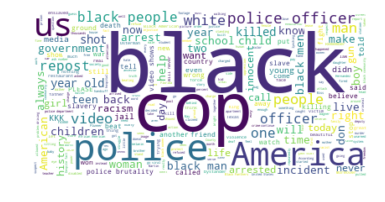

In [11]:
plot_wc(blacktivist)

The word cloud above shows that main keyword in blacktivist page seems "black", "cop", "police", "officer".

I don't know about the political situation in the US so much. 
I heard some news about bad attitude of police officer for black people.
I assume these things are tipical example related to that page. 
That might be the reason why those keywords appears.

#### 2.2.2 Basic statistics about Being patriotic page

In this section, I show statistical summary and some important column(oldest, latest, most shared) and user comment count plot and word cloud plot with formatted being_patriotic data as we describe above. 

I use same functions I define section 2.2.1.

In [12]:
show_basic_info(being_patriotic, "being patriotic")

Data: being patriotic
Shape(row, column): (496, 5) 
----------

columns summary
           followers   interactions
count     496.000000     496.000000
mean   102779.743952    8955.649194
std     80702.346175   32547.147743
min         0.000000    3927.000000
25%         0.000000    5453.000000
50%    128831.000000    6336.500000
75%    182657.000000    8237.500000
max    219727.000000  724323.000000 
----------

Show first 5 data
   followers  interactions                                       post_message  \
0     145109        724323  At least 50,000 homeless veterans are starving...   
1     205550         78245  The city of New Orleans said that it would rem...   
2          0         39740  A living, breathing page of American history! ...   
3     203212         30506  Nothing can be more treasonous than burning th...   
4     187254         30070  It’s simply unfair that the Government cares m...   

        page_label                  datetime  
0  being_patriotic 2016-09-08 1

In [13]:
show_important_columns(being_patriotic)

show important columns

# latest data
followers                          219727
interactions                         6684
post_message          Ain't it the truth?
page_label                being_patriotic
datetime        2017-08-15 20:22:00-05:00
Name: 213, dtype: object

# oldest data
followers                                                       0
interactions                                                39740
post_message    A living, breathing page of American history! ...
page_label                                        being_patriotic
datetime                                2015-08-08 12:15:26-05:00
Name: 2, dtype: object

# highest interaction data
followers                                                  145109
interactions                                               724323
post_message    At least 50,000 homeless veterans are starving...
page_label                                        being_patriotic
datetime                                2016-09-08 14:30:00-05:00
N

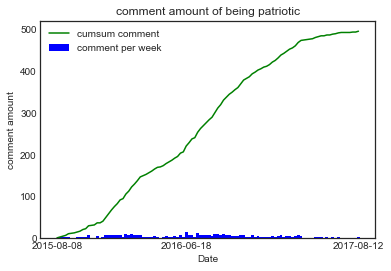

In [129]:
show_time_plot(being_patriotic, 'being patriotic')

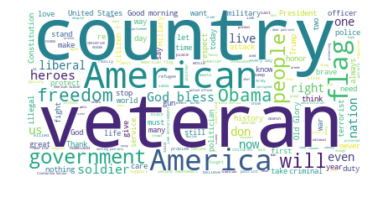

In [130]:
plot_wc(being_patriotic)

#### 2.2.3 Basic statistics about LGBT united page

In this section, I show basic information about lgbt_united page data samely above.


In [131]:
show_basic_info(lgbt_united, "lgbt united")

Data: lgbt united
Shape(row, column): (500, 5) 
----------

columns summary
           followers  interactions
count     500.000000    500.000000
mean    10374.988000   2524.772000
std     36750.688255   4958.490841
min         0.000000    921.000000
25%         0.000000   1458.000000
50%         0.000000   1752.500000
75%         0.000000   2239.500000
max    142874.000000  82298.000000 
----------

Show first 5 data
   followers  interactions                                       post_message  \
0          0         82298  It really doesn't matter! You know who you are...   
1          0         61819  All of the horrified faces in the background...😄👍   
2          0         33447  This is why it's important to think before you...   
3          0         15686                I'm totally saying this next time!😂   
4          0         14400  This is why it's important to think before you...   

    page_label                  datetime  
0  lgbt_united 2015-10-30 15:20:00-05:00  
1  lg

In [132]:
show_important_columns(lgbt_united)

show important columns

# latest data
followers                                                  142874
interactions                                                 1178
post_message    Fun double standard. Hm, scratch that. It's no...
page_label                                            lgbt_united
datetime                                2017-08-24 15:59:47-05:00
Name: 473, dtype: object

# oldest data
followers                                                       0
interactions                                                 1162
post_message    #queerquote #NeilPatrickHarris #family #LGBTyo...
page_label                                            lgbt_united
datetime                                2015-07-12 18:35:01-05:00
Name: 476, dtype: object

# highest interaction data
followers                                                       0
interactions                                                82298
post_message    It really doesn't matter! You know who you are...
page_label 

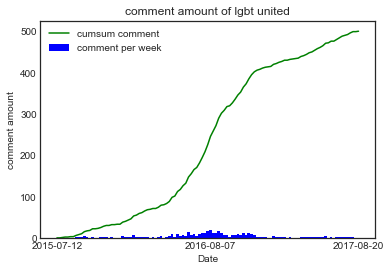

In [133]:
show_time_plot(lgbt_united, 'lgbt united')

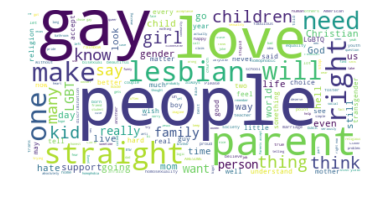

In [134]:
plot_wc(lgbt_united)

#### 2.2.4 Basic statistics about Secured Borders page

In [14]:
show_basic_info(secured_borders, "secured borders")

Data: secured borders
Shape(row, column): (500, 5) 
----------

columns summary
           followers  interactions
count     500.000000     500.00000
mean    11200.272000    3185.54200
std     45480.374095    5027.32195
min         0.000000    1103.00000
25%         0.000000    1779.75000
50%         0.000000    2464.00000
75%         0.000000    3524.25000
max    546007.000000  100707.00000 
----------

Show first 5 data
   followers  interactions                                       post_message  \
0          0        100707  As I've said before, I'm really concerned if v...   
1          0         43668  Mexican-American whose parents came into Ameri...   
2          0         16087  Our government spends billions of dollars on i...   
3     389504         15425                     (Prepare to Take America Back)   
4     546007         11876                     (Judge Jeanine Pirro has Fans)   

        page_label                  datetime  
0  secured_borders 2016-10-07 20:00:00-0

In [136]:
show_important_columns(secured_borders)

show important columns

# latest data
followers                                                  135784
interactions                                                 2320
post_message     It’s utterly despicable that mosques were all...
page_label                                        secured_borders
datetime                                2017-08-20 13:00:00-05:00
Name: 274, dtype: object

# oldest data
followers                                                       0
interactions                                                 3319
post_message    What a disgrace! Our liberal government is for...
page_label                                        secured_borders
datetime                                2016-09-12 09:01:12-05:00
Name: 142, dtype: object

# highest interaction data
followers                                                       0
interactions                                               100707
post_message    As I've said before, I'm really concerned if v...
page_label 

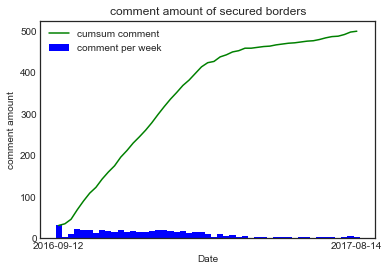

In [137]:
show_time_plot(secured_borders, 'secured borders')

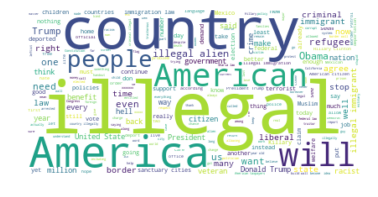

In [138]:
plot_wc(secured_borders)

#### 2.2.5 Basic statistics about United Muslims of America page

In [139]:
show_basic_info(united_muslims_of_america, "united muslims of america")

Data: united muslims of america
Shape(row, column): (500, 5) 
----------

columns summary
           followers   interactions
count     500.000000     500.000000
mean   142711.790000    4257.750000
std    136249.685866   10378.618766
min         0.000000    1303.000000
25%         0.000000    2215.000000
50%    207571.000000    2672.000000
75%    268736.000000    3499.500000
max    329520.000000  150246.000000 
----------

Show first 5 data
   followers  interactions                                       post_message  \
0          0        150246  New York city Muslim Harassment Social Experim...   
1          0        133501  I think God has ordered all mankind with modes...   
2          0         80066  What Halal meat or Halal food means? you shoul...   
3          0         79918  Because the media wants you to know ONLY when ...   
4          0         35275  Share if you believe Muslims have nothing to d...   

       page_label                  datetime  
0  united_muslims 2016

In [140]:
show_important_columns(united_muslims_of_america)

show important columns

# latest data
followers                                                  329520
interactions                                                 2797
post_message    If a woman is free to show her body, why shoul...
page_label                                         united_muslims
datetime                                2017-08-23 11:54:00-05:00
Name: 224, dtype: object

# oldest data
followers                                                       0
interactions                                                 4351
post_message    Hillary Clinton Slams Donald Trump’s Anti-Musl...
page_label                                         united_muslims
datetime                                2016-01-26 09:14:23-06:00
Name: 76, dtype: object

# highest interaction data
followers                                                       0
interactions                                               150246
post_message    New York city Muslim Harassment Social Experim...
page_label  

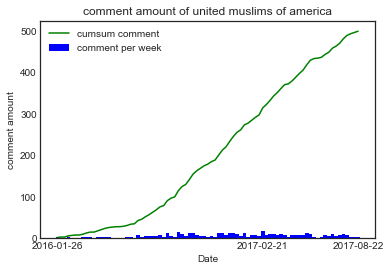

In [141]:
show_time_plot(united_muslims_of_america, 'united muslims of america')

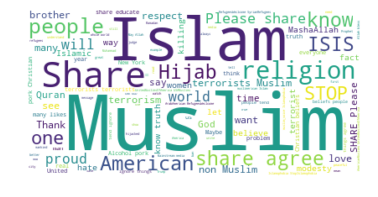

In [31]:
plot_wc(united_muslims_of_america)

#### 2.2.6 All data

In this section, conbining all data and show some information like oldest, latest, and most shared user comment, user comment amount plot, wordcloud.

(2494, 5)
show important columns

# latest data
followers                                           389601
interactions                                          5162
post_message    DON'T PRETEND THAT AGGRESSION HAS NO COLOR
page_label                                     blacktivist
datetime                         2017-08-26 06:00:00-05:00
Name: 295, dtype: object

# oldest data
followers                                                       0
interactions                                                 1162
post_message    #queerquote #NeilPatrickHarris #family #LGBTyo...
page_label                                            lgbt_united
datetime                                2015-07-12 18:35:01-05:00
Name: 476, dtype: object

# highest interaction data
followers                                                  145109
interactions                                               724323
post_message    At least 50,000 homeless veterans are starving...
page_label                          

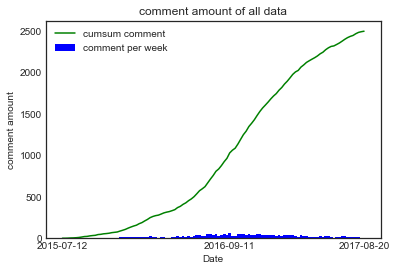

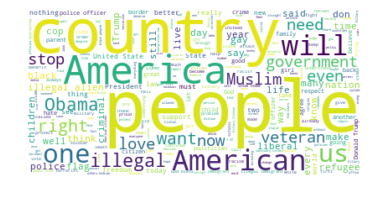

In [18]:
all_data = pd.concat([blacktivist, being_patriotic, lgbt_united, secured_borders, united_muslims_of_america])
all_data.reset_index()  # reset index
print(all_data.shape)
show_important_columns(all_data)
show_time_plot(all_data, 'all data')
plot_wc(all_data)


# TODO: show some columns histgram to confirm Z-scaling

----

## 3. Data formatting

In this section, I use all_data's user_comment, and format post_message text data to generate tfidf matrix.

In [19]:
# save blob
import pickle
from os.path import exists


def save_object(path, fit):
    """
    function to save object to pickle file
    use fit() to create object, and return object anyway.
    
    :param path: 
    :param fit: 
    :return: 
    """
    if exists(path):
        with open(path, 'rb') as f:
            return pickle.load(f)
    else:
        obj = fit()
        with open(path, 'wb') as f:
            pickle.dump(obj, f)
            f.close()
        return obj

In [20]:
# make term document matrix
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf_vec_run():
    vectorizer = TfidfVectorizer(
        use_idf=True,
        analyzer='word',
        stop_words='english',
        lowercase=True
    )
    vectorizer.fit(all_data['post_message'])
    return vectorizer

vectorizer = save_object(tfidf_vectorizer_path, tfidf_vec_run)  # path defined in top of the notebook

matrix = vectorizer.transform(all_data['post_message'])

#### 3.1. showing PCA decomposition

In this section, doing PCA and find first n principle components that explain more than 90% of the data.

In [21]:
# PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


matrix_array = matrix.toarray()
size = matrix_array.shape


n_component_list = [x*100 for x in range(int(size[0]/100))]


def pca_run():
    n_component_explanation_rate_list = list()
    for n_component in n_component_list:
        pca = PCA(n_components=n_component)
        # pca = KernelPCA(n_components=2,  kernel='rbf', gamma=1.0)
        pca.fit_transform(matrix_array)
        n_component_explanation_rate_list.append(sum(pca.explained_variance_ratio_))
    return n_component_explanation_rate_list

n_component_explanation_rate_list = save_object(pca_result_path, pca_run)  # path defined in top of the notebook

print('PCA explanation rate')
print('component:\t cumsum explanation rate')
for n_component, rate in zip(n_component_list, n_component_explanation_rate_list):
    print("%d:\t %0.3f" % (n_component, rate))


PCA explanation rate
component:	 cumsum explanation rate
0:	 0.000
100:	 0.280
200:	 0.409
300:	 0.498
400:	 0.571
500:	 0.631
600:	 0.682
700:	 0.727
800:	 0.766
900:	 0.801
1000:	 0.833
1100:	 0.861
1200:	 0.887
1300:	 0.910
1400:	 0.929
1500:	 0.947
1600:	 0.962
1700:	 0.974
1800:	 0.984
1900:	 0.992
2000:	 0.997
2100:	 1.000
2200:	 1.000
2300:	 1.000


In [23]:
# use first 900 components(explain more than 80%)
# use first 1300 components(explain more than 90%)

pca900 = PCA(n_components=900)
pca1300 = PCA(n_components=1300)

tfidf900 = pca900.fit_transform(matrix_array)
tfidf1300 = pca1300.fit_transform(matrix_array)

----

## 3 Model

What I do in this project is to predict interaction amount from comment data.
So, I try following models.

- Linear Regression
- Lasso
- Neural Network

But, before tring model, first setting up data.

In [23]:
print(all_data.columns)

Index(['followers', 'interactions', 'post_message', 'page_label', 'datetime'], dtype='object')


In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

y = all_data['interactions'].as_matrix()

X = matrix.toarray()  # tfidf matrix
x_follower_vec = all_data['followers'].as_matrix()  # if doing normalize, need to check histrgram
dt_vec = list()
for dt in all_data['datetime']:
    dt_vec.append(dt.timestamp())
dt_vec = np.array(dt_vec)


In [25]:

# combine followers, and timestamp operation
def combine_x(data, show_flg=False):
    origin_shape = data.shape
    last = data.shape[1]
    data = np.append(data, x_follower_vec.reshape(len(x_follower_vec),1), axis=1)
    data = np.append(data, dt_vec.reshape(len(dt_vec), 1), axis=1)
    if show_flg:
        print("original data shape",origin_shape)
        print("after adding follwers, timestamp shape", data.shape, end='\n\n')
    return data, last

X, tfidf_end = combine_x(X, True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("splitted shape")
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

X_tfidf_train = X_train[:, 0:tfidf_end]
X_tfidf_test =X_test[:, 0:tfidf_end]
print(X_tfidf_train.shape)


original data shape (2494, 8712)
after adding follwers, timestamp shape (2494, 8714)

splitted shape
(1995, 8714)
(499, 8714)
(1995,)
(499,)
(1995, 8712)


In [26]:
# samely, make X from tfidf900, tfidf1300

X900, last900 = combine_x(tfidf900, True)
X1300, last1300 = combine_x(tfidf1300, True)

X900_train, X900_test, y900_train, y900_test = train_test_split(X, y, test_size=0.2, random_state=0)
X1300_train, X1300_test, y1300_train, y1300_test = train_test_split(X, y, test_size=0.2, random_state=0)

X900_tfidf_train = X900_train[:, 0:last900]
X900_tfidf_test =X900_test[:, 0:last900]

X1300_tfidf_train = X1300_train[:, 0:last1300]
X1300_tfidf_test =X1300_test[:, 0:last1300]


original data shape (2494, 900)
after adding follwers, timestamp shape (2494, 902)

original data shape (2494, 1300)
after adding follwers, timestamp shape (2494, 1302)



### 4.1. Linear regression

In this section, I try linear regression to think that using regression schema to assume interaction from user comment data is meaningful or not.

In [27]:
from sklearn.linear_model import LinearRegression

# tfidf only without pca decomposition
ln_tfidf = LinearRegression()
ln_tfidf.fit(X_tfidf_train, y_train)

# tfidf, follower amount, timestamp without pca decomposition
ln = LinearRegression()
ln.fit(X_train, y_train)

# tfidf only with pca 900 decomposition
ln900_tfidf = LinearRegression()
ln900_tfidf.fit(X900_tfidf_train, y900_train)

# tfidf, follower amount, timestamp with pca 900 decomposition
ln900 = LinearRegression()
ln900.fit(X900_train, y900_train)

# tfidf only with pca 1300 decomposition
ln1300_tfidf = LinearRegression()
ln1300_tfidf.fit(X1300_tfidf_train, y1300_train)

# tfidf, follower amount, timestamp with pca 900 decomposition
ln1300 = LinearRegression()
ln1300.fit(X1300_train, y1300_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

# ln.score calculates R^2 score


def show_result(model, train_X, test_X, train_y, test_y, title):
    pred_y = model.predict(test_X)
    pred_train_y = model.predict(train_X)
    print('Calculate with %s data' % title)
    print('train R^2 score', r2_score(train_y, pred_train_y))
    print('train mean squared score', mean_squared_error(train_y, pred_train_y))
    print('test mean squared score', mean_squared_error(test_y, pred_y), end='\n\n')


show_result(ln, X_train, X_test, y_train, y_test, 'tfidf, follower amount, and timestamp')
show_result(ln_tfidf, X_tfidf_train, X_tfidf_test, y_train, y_test, 'only tfidf')
show_result(ln900, X900_train, X900_test, y900_train, y900_test,
            'decompose 900 dim, tfidf, follower amount, and timestamp')
show_result(ln900_tfidf, X900_tfidf_train, X900_tfidf_test, y900_train, y900_test,
            'decompose 900 dim, tfidf')
show_result(ln1300, X1300_train, X1300_test, y1300_train, y1300_test,
            'decompose 1300 dim, tfidf, follower amount, and timestamp')
show_result(ln1300_tfidf, X1300_tfidf_train, X1300_tfidf_test, y1300_train, y1300_test,
            'decompose 1300 dim, tfidf')


Calculate with tfidf, follower amount, and timestamp data
train R^2 score 0.718331987433
train mean squared score 127096963.984
test mean squared score 7.7836834665e+14

Calculate with only tfidf data
train R^2 score 0.59399681458


train mean squared score 183200682.834
test mean squared score 8.61984000925e+34

Calculate with decompose 900 dim, tfidf, follower amount, and timestamp data
train R^2 score 0.718331987433
train mean squared score 127096963.984
test mean squared score 7.7836834665e+14

Calculate with decompose 900 dim, tfidf data
train R^2 score 0.494997941955
train mean squared score 227871911.326
test mean squared score 5.93466220181e+34

Calculate with decompose 1300 dim, tfidf, follower amount, and timestamp data
train R^2 score 0.718331987433
train mean squared score 127096963.984
test mean squared score 7.7836834665e+14

Calculate with decompose 1300 dim, tfidf data
train R^2 score 0.547685050875
train mean squared score 204097924.625
test mean squared score 8.09389727262e+34



I assume the result above shows somewhat relation between comment data and amount of interaction due to train R\^2 score.
But, some meaningless weight might decay the prediction, and that causes bad test R\^2 score.

So, I try standarization from next task with Lasso.

I also compare 2 train data, one is post_message text's tfidf matrix, the other is tfidf and follower amount and timestamp data.

The reason I add those 2 additional columns are due to following 2 assumption.

- More followers leads to more interaction
- Older post have more time to get interaction

The result supports using follower amount and timestamp leads better prediction.

After that, I use 2 decomposed version and do samething. 
From the result, I use decompose with first 900 principle component(explain more than 80%) with follower amount and timestamp data from the experiment below.



### 4.2. Lasso regression

In this section, I try lasso regression to omit meaningless parameter's effect.

In [108]:
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')

for alpha in [0.02, 0.5, 1, 5, 10, 100]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X900_train, y900_train)
    show_result(lasso, X900_train, X900_test, y900_train, y900_test, 'alpha=%0.3f' % alpha)

Calculate with alpha=0.020 data
train R^2 score 0.718061536466
train mean squared score 127218999.484
test mean squared score 456180564.813



Calculate with alpha=0.500 data
train R^2 score 0.706462919815
train mean squared score 132452639.432
test mean squared score 345242164.672



Calculate with alpha=1.000 data
train R^2 score 0.698805237529
train mean squared score 135908012.873
test mean squared score 332749847.308



Calculate with alpha=5.000 data
train R^2 score 0.649131971267
train mean squared score 158322064.35
test mean squared score 271502113.333



Calculate with alpha=10.000 data
train R^2 score 0.595980972901
train mean squared score 182305371.731
test mean squared score 242463295.643



Calculate with alpha=100.000 data
train R^2 score 0.0293998890218
train mean squared score 437963566.482
test mean squared score 207277673.798



As the result above shows, increasing alpha parameter decreases both train and test criteria.
But, higher alphas like 100 is too much to protect overfitting.

I think alpha=0.5 or 1 seems better both train and test criteria decreasing and prevent overfitting.

From now, I assume the data has somewhat nonlinear relationship.
So, I try neural network.

### 4.3. Neural Network

In this section, I try neural network model.

In [110]:
from sklearn.neural_network import MLPRegressor

# maybe change Keras.
model = MLPRegressor(
    activation='relu',
    hidden_layer_sizes=(100, 100, 100, 100),
    random_state=1
)
model.fit(X900_train, y900_train)
show_result(model, X900_train, X900_test, y900_train, y900_test, '')


Calculate with  data
train R^2 score -0.00472114936687
train mean squared score 453359991.328
test mean squared score 212714886.471



In [91]:

print(sum(y900_test * y900_test))

6614
123472955986


In [38]:
from sklearn.ensemble import RandomForestRegressor

model_list = list()


def rf10_run():
    model = RandomForestRegressor(n_estimators=10, max_features='log2', random_state=1)
    model.fit(X_train, y_train)
    return model

model = save_object(random_forest10_path, rf10_run)
model_list.append(model)


def rf100_run():
    model = RandomForestRegressor(n_estimators=100, max_features='log2', random_state=1)
    model.fit(X_train, y_train)
    return model

model = save_object(random_forest100_path, rf100_run)
model_list.append(model)


def rf1000_run():
    model = RandomForestRegressor(n_estimators=1000, max_features='log2', random_state=1)
    model.fit(X_train, y_train)
    return model

model = save_object(random_forest1000_path, rf1000_run)
model_list.append(model)

for model in model_list:
    show_result(model, X900_train, X900_test, y900_train, y900_test, '')


Calculate with  data
train R^2 score 0.615783429598
train mean squared score 173369915.757
test mean squared score 222698963.616



Calculate with  data
train R^2 score 0.834515673458
train mean squared score 74671437.8345
test mean squared score 215038324.432



Calculate with  data
train R^2 score 0.836933281467
train mean squared score 73580541.3735
test mean squared score 212124780.473

